### In this notebook focus is on top 40 routes and how will LighGBM perform. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve

In [ ]:
# Function to generate Confusion matrix
def confusion_matrix_custom(act, predict):
  # Compute Confusion matrix
  print("Actual, Predicted Observations:  ",len(act), len(predict))
  anpn = 0
  anpy = 0
  aypn = 0
  aypy = 0
  
  for i in range(len(act)):
      if (act[i]==0 and predict[i]==0):
          anpn = anpn + 1
      elif (act[i]==0 and predict[i]==1):
          anpy = anpy + 1
      elif (act[i]==1 and predict[i]==0):
          aypn = aypn + 1
      else:
          aypy = aypy + 1
  # Confusoin matrix
  print ("--------------------------------------------")
  print ("Confusion Matrix")
  print ("--------------------------------------------")
  print ("              ", "Predicted N", "Predicted Y")
  print ("Actual N      ", anpn,"          ", anpy) 
  print ("Actual Y      ", aypn,"          ", aypy)
  print ("--------------------------------------------")
  print ("Total observations  :  ", anpn+anpy+aypn+aypy)
  print ("False Positives     :  ", anpy)
  print ("False Negatives     :  ", aypn)
  print ("Overall Accuracy    :  ", round((float(anpn+aypy)/float(anpn+anpy+aypn+aypy))*100, 2), "%")
  print ("Sensitivity/Recall  :  ", round((float(aypy)/float(aypn+aypy))*100, 2), "%")
  print ("Specificity         :  ", round((float(anpn)/float(anpn+anpy))*100, 2), "%")
  print ("Precision           :  ", round((float(aypy)/float(anpy+aypy))*100, 2), "%")
  print ("--------------------------------------------")

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Location Intelligence

In [ ]:
df = pd.read_csv("Classification with FlightRoute of SpiceJet/AncillaryScoring_insurance.csv",encoding='latin-1')

### EDA

In [ ]:
data['ROUTE'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
BTJJED       1
URTXIY       1
MRUTPE       1
CSXMRU       1
JEDMFM       1
Name: ROUTE, Length: 799, dtype: int64

In [ ]:
# top_20_routes = list(data['ROUTE'].value_counts()[:20].index)
# top_30_routes = list(data['ROUTE'].value_counts()[:30].index)
top_40_routes = list(data['ROUTE'].value_counts()[:40].index)

In [ ]:
#top_40_routes

In [ ]:
data = data[data['ROUTE'].isin(top_40_routes)]

### Preprocessing

In [ ]:
# Removing ID column 
len(data['Id'].unique()) # 50000 , which is equal to the number of rows, this may be dropped

data.drop(['Id'], axis=1,inplace=True)
data.shape

(21064, 14)

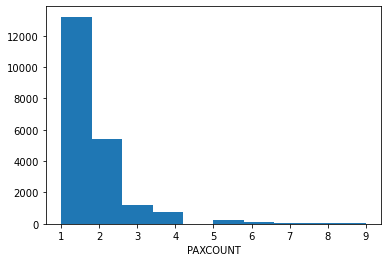

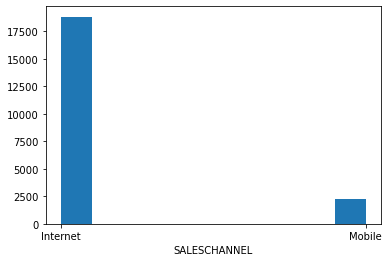

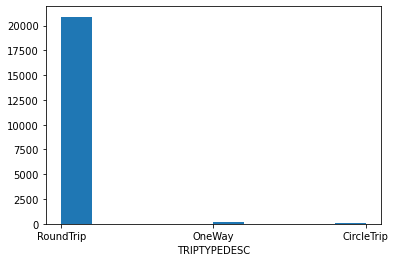

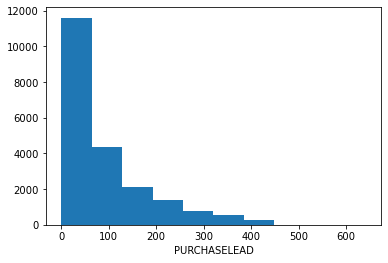

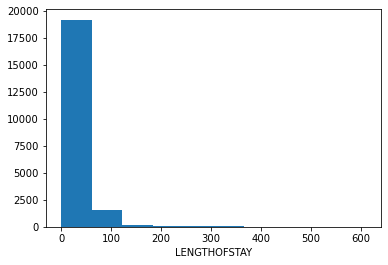

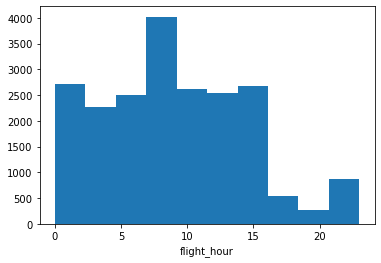

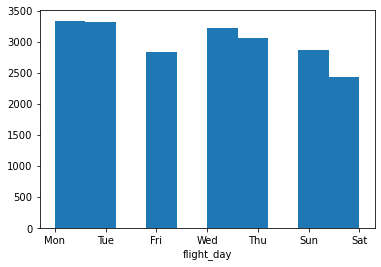

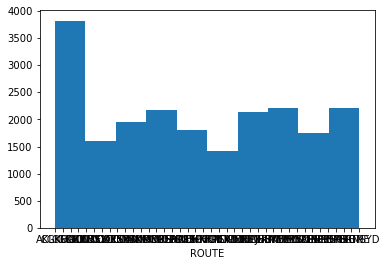

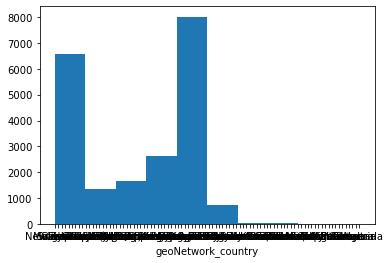

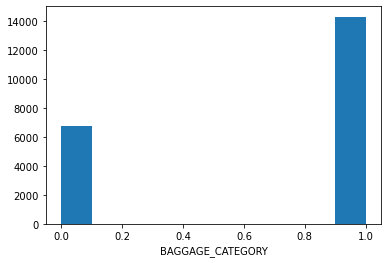

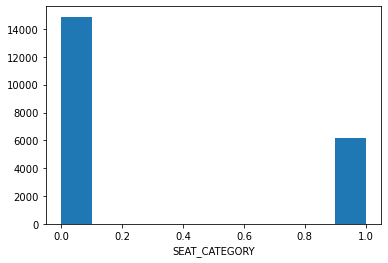

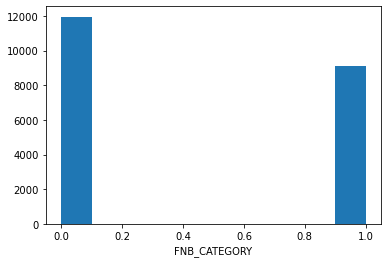

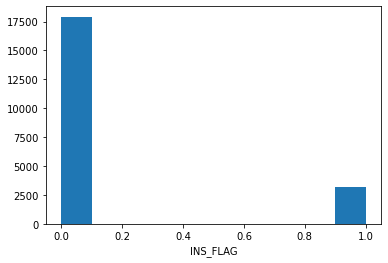

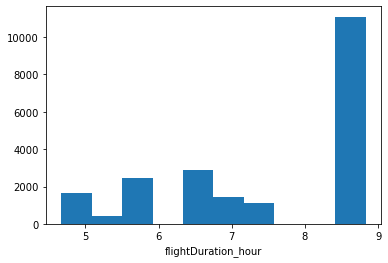

In [ ]:
# Histograms
for i in data.columns:
    plt.hist(data[i])
    plt.xlabel(i)
    plt.show()

<AxesSubplot:>

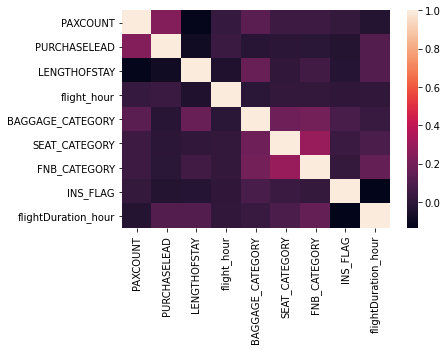

In [ ]:
# Correlation Matrix
sns.heatmap(data.corr())

In [ ]:
string_cols = ['SALESCHANNEL','TRIPTYPEDESC','flight_day','ROUTE','geoNetwork_country']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in string_cols:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [ ]:
num_cols = list(data.columns)

for i in string_cols:
    num_cols.remove(i)
    
num_cols.remove('INS_FLAG')

### Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['INS_FLAG'], axis=1)
y = data['INS_FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LGBM 

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
clf = LGBMClassifier(is_unbalance = True).fit(X_train.values,y_train)
predictions = clf.predict(X_test)

In [ ]:
act = y_test.values
predict = predictions

confusion_matrix_custom(act, predict)

print("F1 Score : {}".format(f1_score(y_test,predictions)))


Actual, Predicted Observations:   4213 4213
--------------------------------------------
Confusion Matrix
--------------------------------------------
               Predicted N Predicted Y
Actual N       2669            896
Actual Y       169            479
--------------------------------------------
Total observations  :   4213
False Positives     :   896
False Negatives     :   169
Overall Accuracy    :   74.72 %
Sensitivity/Recall  :   73.92 %
Specificity         :   74.87 %
Precision           :   34.84 %
--------------------------------------------
F1 Score : 0.47355412753336634


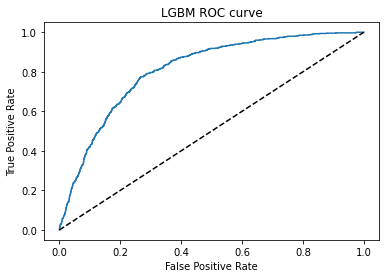

The AUC ROC Score is 0.7439325662736134


In [ ]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBM ROC curve')
# show the plot
plt.show()

print("The AUC ROC Score is {}".format(roc_auc_score(y_test, predictions)))

# Summary